In [1]:
import numpy as np
import pandas as pd
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from google.colab import files
uploaded=files.upload()

Saving Dataset3.csv to Dataset3.csv


In [2]:
import io
data=pd.read_csv(io.BytesIO(uploaded['Dataset3.csv']),header=None)
data

,0,1
0,0.14300,0.98493
1,-0.30467,0.98562
2,0.46625,-0.84003
3,0.94847,0.37222
4,-0.96871,-0.26697
...,...,...
995,4.48210,-7.40030
996,-3.49630,8.63860
997,6.10620,-5.98640
998,-7.40940,-5.52050


In [40]:
df=data.values.tolist()
avg = np.full(data.shape,np.mean(data,axis=0))
df=np.subtract(df,avg)
sd = np.full(data.shape,np.std(df, axis = 0))
df=np.divide(df,sd)
df

array([[ 0.03721355,  0.23990329],
       [-0.07928601,  0.24007136],
       [ 0.12133462, -0.20460953],
       ...,
       [ 1.58904894, -1.45813149],
       [-1.92818785, -1.34465036],
       [-0.03369538, -2.14432818]])

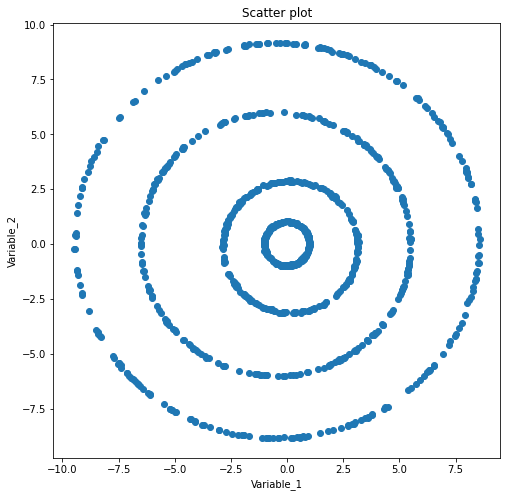

In [24]:
plt.figure(figsize=(8,8))
plt.scatter(*zip(*df))
plt.title('Scatter plot')
plt.xlabel('Variable_1')
plt.ylabel('Variable_2')
plt.show()

In [25]:
print (df.shape)
X=df.T

(1000, 2)


In [33]:
d,n=X.shape
D=2
K=np.add(np.ones((n,n)),np.matmul(np.transpose(X),X))
K=np.power(K,np.full((n,n),D))
np.shape(K)

(1000, 1000)

In [34]:
I=np.identity(n)
One_n=np.full_like(I,(1/n))
M=I-One_n
Kc=np.matmul(M,np.matmul(K,M))
np.shape(Kc)

(1000, 1000)

In [35]:
e_val, e_vec = eigh(Kc)
id=np.argsort(e_val)[::-1]
e_val=e_val[id]
e_vec=e_vec[:,id]
k=2
Alpha_pc = np.column_stack([e_vec[:, i]
                           for i in range(k)]) 
np.shape(Alpha_pc)
Alpha_pc

array([[-0.0216369 ,  0.00218602],
       [-0.02193616,  0.00284154],
       [-0.02234344,  0.00269801],
       ...,
       [-0.00159556,  0.05550981],
       [ 0.05062238, -0.08371748],
       [ 0.07297801,  0.04128523]])

In [36]:
for i in range (k):
 print (e_val[i])
Alpha_scaled=np.column_stack([np.divide(Alpha_pc[:,i],np.sqrt(n*e_val[i])) for i in range(k)])
Alpha_scaled

560408.0328577006
497707.3861499012


array([[-9.13992964e-07,  9.79866604e-08],
       [-9.26634442e-07,  1.27369839e-07],
       [-9.43839079e-07,  1.20936185e-07],
       ...,
       [-6.74003611e-08,  2.48818523e-06],
       [ 2.13840720e-06, -3.75257276e-06],
       [ 3.08276088e-06,  1.85057904e-06]])

In [37]:
#Projection in PC_1
Z_1=[]
for i in range(n):
  sum=0.0
  for j in range (n):
    sum=sum+Alpha_scaled[j][0]*K[i][j]
  Z_1.append(sum)
np.shape(Z_1)

(1000,)

In [38]:
Z_2=[]
for i in range(n):
  sum=0.0
  for j in range (n):
    sum=sum+Alpha_scaled[j][1]*K[i][j]
  Z_2.append(sum)
np.shape(Z_2)

(1000,)

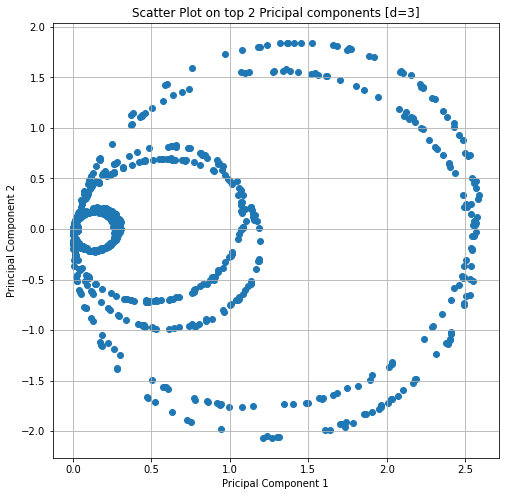

In [39]:
plt.figure(figsize=(8,8))
plt.title('Scatter Plot on top 2 Pricipal components [d=3]')
plt.xlabel('Pricipal Component 1')
plt.ylabel('Principal Component 2')
plt.scatter(Z_1,Z_2)
plt.grid(True)
plt.show()